# Hierarchical Clustering Example

basado en [original post](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

# Example 1: using Scipy and Scikit-learn

### Prepare Data

In [1]:
import numpy as np
#10 points
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

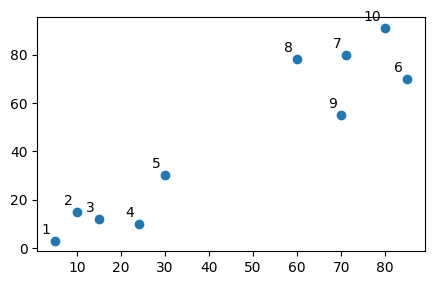

In [2]:
#Plot data
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(5, 3))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

### Clustering agglomerative algorithm with nearest point distance using Scipy

SciPy API:

*  [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

*  [dendogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

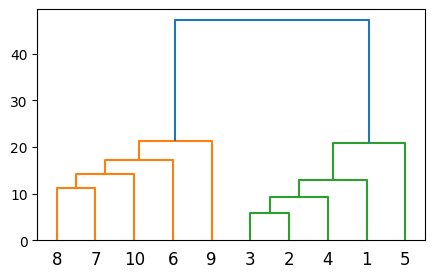

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single') #Performs Agglomerative Clustering using Single linkage metric for distance

labelList = range(1, 11) #Create labels for plot as points do not have labels

#Plot dendogram of hierarchical cluster obtained
plt.figure(figsize=(5, 3))
#dendrogram creates plot
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

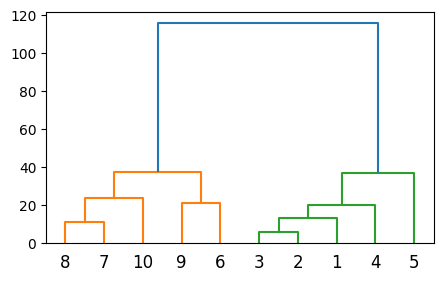

In [4]:
linked = linkage(X, 'complete') #complete linkage
#Plot dendogram of hierarchical cluster obtained
plt.figure(figsize=(5, 3))
#dendrogram creates plot
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### Clustering agglomerative algorithm with farthest point distance using Scikit-learn

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [6]:
#Same 10 points
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete') #n_clusters is the final number of clusters to find
cluster.fit_predict(X) #Predict data

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

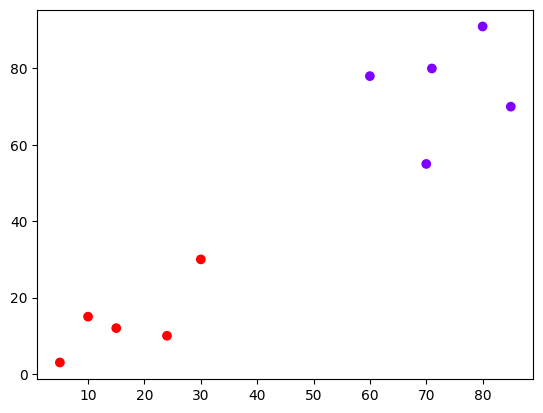

In [8]:
#Show predictions in graph
#cluster.labels_ has the predicted labels
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

# Example 2: using Scikit-learn and Iris

Function to plot dendogram. Creates the linkage matrix needed by scipy's dendrogram function, before calling it.

In [9]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs) #function in scipy imported earlier in notebook



## Load iris data and fit Agglomerative Clustering

In [10]:
from sklearn.datasets import load_iris

[ 4  8  8  8  4 16  8  4  2  8 16  8  8  2  9  9 16  4 16  4 16  4  2  4
  8  8  4  4  4  8  8 16  9  9  8  8 16  4  2  4  4 22  2  4  4  8  4  8
 16  4 17 19 17  1 17  5 19 15 17  1 15  3  1  3  1 17  5  1 18  1 24  3
  0  3  3 17 17  6  3  1  1  1  1  0  5 19 17 18  5  1  5  3  1 15  5  5
  5  3 15  5 12 13 11  7  7 14 20 11  7 10  6  7  6 13 13 12  7 21 14 18
 23 13 14  0 23 11  0 24  7 11 11 21  7  0  0 10 12  7 24  6 23  6 13 23
 23  6  0  6 12 24]


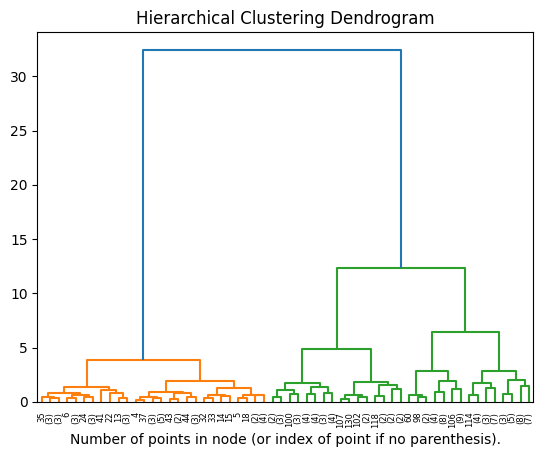

In [11]:
iris = load_iris()
X = iris.data

#distance_threshold is the linkage distance threshold at or above which clusters will not be merged
# setting distance_threshold=0 ensures we compute the full tree.
# n_clusters must be None has distance_threshold is not None
model = AgglomerativeClustering(distance_threshold=1, n_clusters=None)
model = model.fit(X)
print(model.labels_)


plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram use p = 3
plot_dendrogram(model, truncate_mode='level',p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# First Scikit example with dendrogram

[7 9 4 6 8 5 3 2 1 0]


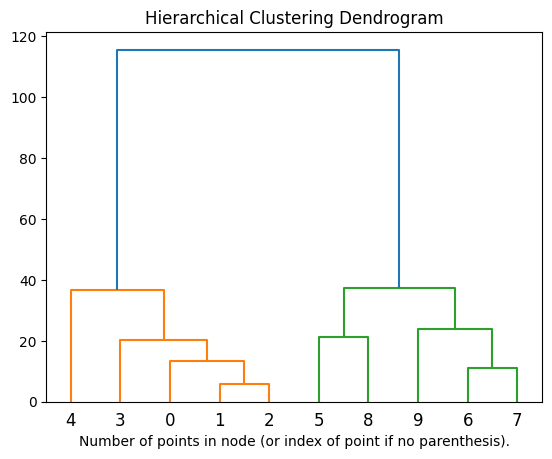

In [12]:
#Same 10 initial points
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,n_clusters=None, metric='euclidean', linkage='complete')
model = model.fit(X)
print(model.labels_)

#Plot dendogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()